In [2]:
import numpy as np

In [3]:
Ks = 2
Y = 2



def f(t, y, pars, X1, X2):
    S, I, P = y
    S0, k1, KS1, k2, KI2, mu12, Y12  = pars

    d = mu12

    dSdt = d * (S0 - S) - k1 * X1 * S / (KS1 + S) - mu12 * (X1 + X2) / Y12
    dIdt = k1 * X1 * S / (KS1 + S) - d * I
    dPdt = k2 * X2 * I / (KI2 + I) - d * P

    return [dSdt, dIdt, dPdt]

In [59]:
S0 = 20
k1 = 0.1
KS1 = 0.1
k2 = 0.1
KI2 = 1
mu12 = 0.3
Y12 = 2

pars = [S0, k1, KS1, k2, KI2, mu12, Y12]

In [60]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

X1_over_X2_array = 10 ** np.linspace(-1, 1, 100)
ss_arr = np.zeros((len(X1_over_X2_array), 3))

X_total = 2

for i, X1_over_X2 in enumerate(X1_over_X2_array):
    X1 = X1_over_X2 * X_total / (1 + X1_over_X2)
    X2 = X_total - X1

    x, infodict, ier, mesg = fsolve(lambda y: f(0, y, pars, X1, X2), [0, 0, 0], full_output=True)

    ss_arr[i, :] = x

Text(0.5, 1.0, 'Max P at: 0.7742636826811272')

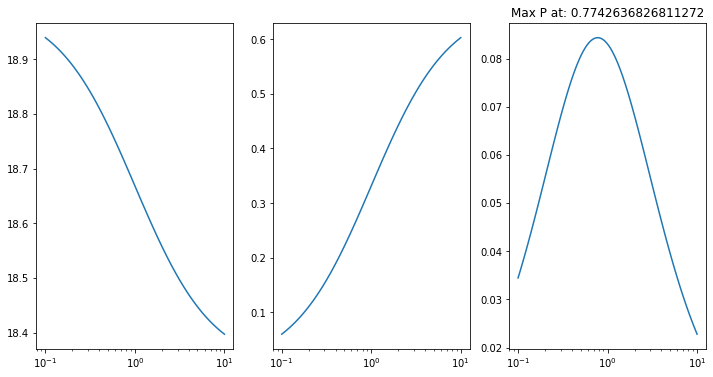

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.subplot(131)
ax.semilogx(X1_over_X2_array, ss_arr[:, 0], label='S')

ax = plt.subplot(132)
ax.semilogx(X1_over_X2_array, ss_arr[:, 1], label='I')

ax = plt.subplot(133)
ax.semilogx(X1_over_X2_array, ss_arr[:, 2], label='P')
ax.set_title('Max P at: ' + str(X1_over_X2_array[np.argmax(ss_arr[:, 2])]))